<a href="https://colab.research.google.com/github/inestrichard/python_ines/blob/main/Populism_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting populist party vote share using a Random Forest Classifier

# Introduction

**Objective**: This project aims to predict the voting share of populist parties in various countries using a Random Forest model.

**Problem statement**: Populist parties have seen fluctuating vote shares over the years. We aim to predict their share based on historical data and socio-economic factors.

**Data Source**: The dataset includes electoral results, economic indicators, and political trends, compiled from various sources. Further details on the dataset can be found here: https://docs.google.com/spreadsheets/d/1rQMbaS2bEyyO2_H6_9LAyWMi1MGJkJcC/edit?usp=sharing&ouid=117512593816260069481&rtpof=true&sd=true.

**Expected outcome**: A machine learning model that forecasts populist vote shares for the year 2025, from which country scorecards are derived.

# Data loading and pre-processing

In [ ]:
# Importing the libraries necessary for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Uploading the full dataset
df= pd.read_excel('https://docs.google.com/spreadsheets/d/1rQMbaS2bEyyO2_H6_9LAyWMi1MGJkJcC/export?format=xlsx')

# Displaying basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7441 entries, 0 to 7440
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            7441 non-null   object 
 1   ISO                                0 non-null      float64
 2   Year                               7441 non-null   int64  
 3   GDP_USD                            5779 non-null   float64
 4   rGDP_USD_pct_change                5720 non-null   float64
 5   Migration                          2100 non-null   float64
 6   Gini Index                         1930 non-null   float64
 7   Import_gdp                         3160 non-null   float64
 8   Corruption_index                   7236 non-null   float64
 9   Rule_of_law_index                  7237 non-null   float64
 10  Confidence                         1453 non-null   float64
 11  Inflation                          6063 non-null   float

In [ ]:
# Displaying top rows
df.head()

,Country,ISO,Year,GDP_USD,rGDP_USD_pct_change,Migration,Gini Index,Import_gdp,Corruption_index,Rule_of_law_index,...,percentage_5,populist1_6,percentage_6,populist1_7,percentage_7,total_percentage,total_percentage_change,first_appearance_total_percentage,total_percentage_interpolated,Unnamed: 23
0,United States,NaN,1959,3320832.8,NaN,NaN,NaN,NaN,0.063,0.924,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,United States,NaN,1960,3406326.3,2.574460,NaN,NaN,NaN,0.062,0.925,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,United States,NaN,1961,3493710.0,2.565336,NaN,NaN,NaN,0.062,0.925,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,United States,NaN,1962,3707860.8,6.129610,NaN,NaN,NaN,0.062,0.925,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,United States,NaN,1963,3869423.3,4.357297,NaN,37.6,NaN,0.062,0.925,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


**Preliminary cleaning**

In [ ]:
# Replacing missing values in the total_percentage_intrapolated with 0 (as they should match total_percentage)
df['total_percentage_interpolated'] = df['total_percentage_interpolated'].fillna(0)

# Replacing any infinite values with Nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Checking the variables and corresponding data types in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7441 entries, 0 to 7440
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            7441 non-null   object 
 1   ISO                                0 non-null      float64
 2   Year                               7441 non-null   int64  
 3   GDP_USD                            5779 non-null   float64
 4   rGDP_USD_pct_change                5720 non-null   float64
 5   Migration                          2100 non-null   float64
 6   Gini Index                         1930 non-null   float64
 7   Import_gdp                         3160 non-null   float64
 8   Corruption_index                   7236 non-null   float64
 9   Rule_of_law_index                  7237 non-null   float64
 10  Confidence                         1453 non-null   float64
 11  Inflation                          6063 non-null   float

**Restricting the dataset to the selected predictors**

In [ ]:
# Structuring the dataset in 'features' and 'targets' to later train our Machine Learning model

features = [
   'Country',
 'Year',
 'GDP_USD',
 'Migration',
 'Gini Index',
 'Import_gdp',
 'Corruption_index',
 'Rule_of_law_index',
 'Inflation',
 'Unemployment',
 'Govexp_GDP',
 'Govdef_GDP',
 'Govdebt_GDP',
 'Cbrate',
   'Migration_pct_change',
]

targets = ['total_percentage',
 'total_percentage_change',
 'first_appearance_total_percentage',
 'total_percentage_interpolated']

df_clean = df[ features + targets]


# Having a look at the selected version of the dataset
df_clean.head()

,Country,Year,GDP_USD,Migration,Gini Index,Import_gdp,Corruption_index,Rule_of_law_index,Inflation,Unemployment,Govexp_GDP,Govdef_GDP,Govdebt_GDP,Cbrate,Migration_pct_change,total_percentage,total_percentage_change,first_appearance_total_percentage,total_percentage_interpolated
0,United States,1959,3320832.8,NaN,NaN,NaN,0.063,0.924,1.01,5.47,17.65,-2.51,50.90,4.00,NaN,0.0,NaN,0.0,0.0
1,United States,1960,3406326.3,NaN,NaN,NaN,0.062,0.925,1.46,5.56,26.59,-0.19,48.84,3.00,NaN,0.0,0.0,NaN,0.0
2,United States,1961,3493710.0,NaN,NaN,NaN,0.062,0.925,1.07,6.68,27.97,-1.49,48.71,2.50,NaN,0.0,0.0,NaN,0.0
3,United States,1962,3707860.8,NaN,NaN,NaN,0.062,0.925,1.20,5.55,28.30,-1.38,46.68,3.00,NaN,0.0,0.0,NaN,0.0
4,United States,1963,3869423.3,NaN,37.6,NaN,0.062,0.925,1.24,5.64,28.14,-0.65,45.10,3.25,NaN,0.0,0.0,NaN,0.0


In [ ]:
# Checking the variables and corresponding data types in our dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7441 entries, 0 to 7440
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            7441 non-null   object 
 1   Year                               7441 non-null   int64  
 2   GDP_USD                            5779 non-null   float64
 3   Migration                          2100 non-null   float64
 4   Gini Index                         1930 non-null   float64
 5   Import_gdp                         3160 non-null   float64
 6   Corruption_index                   7236 non-null   float64
 7   Rule_of_law_index                  7237 non-null   float64
 8   Inflation                          6063 non-null   float64
 9   Unemployment                       3824 non-null   float64
 10  Govexp_GDP                         5594 non-null   float64
 11  Govdef_GDP                         5303 non-null   float

**Creating new variables for the analysis: (1) a categorical variable for 'decade'; (2) a column encoding our continuous outcome variable 'total_percentage_interpolate' as a categorical outcome variable 'total_percentage_category'; (3) an ordinal variable 'Country_code' for each country**

In [ ]:
# 1

# Creating a new categorical variable for 'decade' as a predictor
df_clean['Decade'] = (df_clean['Year'] // 10) * 10

# Transforming the categorical 'decade' column into a numerical variable (ordinal encoding)
df_clean['Decade'] = df_clean['Decade'].astype('category')

df_clean.head()

<ipython-input-7-063f93d6c186>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Decade'] = (df_clean['Year'] // 10) * 10
<ipython-input-7-063f93d6c186>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Decade'] = df_clean['Decade'].astype('category')


,Country,Year,GDP_USD,Migration,Gini Index,Import_gdp,Corruption_index,Rule_of_law_index,Inflation,Unemployment,Govexp_GDP,Govdef_GDP,Govdebt_GDP,Cbrate,Migration_pct_change,total_percentage,total_percentage_change,first_appearance_total_percentage,total_percentage_interpolated,Decade
0,United States,1959,3320832.8,NaN,NaN,NaN,0.063,0.924,1.01,5.47,17.65,-2.51,50.90,4.00,NaN,0.0,NaN,0.0,0.0,1950
1,United States,1960,3406326.3,NaN,NaN,NaN,0.062,0.925,1.46,5.56,26.59,-0.19,48.84,3.00,NaN,0.0,0.0,NaN,0.0,1960
2,United States,1961,3493710.0,NaN,NaN,NaN,0.062,0.925,1.07,6.68,27.97,-1.49,48.71,2.50,NaN,0.0,0.0,NaN,0.0,1960
3,United States,1962,3707860.8,NaN,NaN,NaN,0.062,0.925,1.20,5.55,28.30,-1.38,46.68,3.00,NaN,0.0,0.0,NaN,0.0,1960
4,United States,1963,3869423.3,NaN,37.6,NaN,0.062,0.925,1.24,5.64,28.14,-0.65,45.10,3.25,NaN,0.0,0.0,NaN,0.0,1960


In [ ]:
# 2 (note that this categorical outcome is drawn from the 'total_percentage_interpolated', not the 'total_percentage')

# Define bins (edges) and corresponding labels
bins = [0, 0.0001, 15, 30, 50, 100]  # Upper edges for each category
labels = ['0%', '(0,15%]', '(15,30%]', '(30,50%]', '(50%+]']

# Create categorical outcome variable
df_clean['total_percentage_category'] = pd.cut(df_clean['total_percentage_interpolated'], bins=bins, labels=labels, right=False)

# Convert to categorical
df_clean['total_percentage_category'] = df_clean['total_percentage_category'].astype('category')

df_clean['total_percentage_category'].value_counts()

<ipython-input-8-e16c097b2cd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_percentage_category'] = pd.cut(df_clean['total_percentage_interpolated'], bins=bins, labels=labels, right=False)
<ipython-input-8-e16c097b2cd0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_percentage_category'] = df_clean['total_percentage_category'].astype('category')


,count
total_percentage_category,
0%,5276
"(30,50%]",798
"(0,15%]",570
"(15,30%]",401
(50%+],384


In [ ]:
# 3

# Transforming 'country' variable into a categorical variable
df_clean['Country_code'] = df_clean['Country'].astype('category').cat.codes

<ipython-input-9-a97a8784906e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Country_code'] = df_clean['Country'].astype('category').cat.codes


**Creating a column for (1) 'previous year of populist vote share'; (2) 'populist vote share 5 years before'**

In [ ]:
df_clean["prev_year_populist_share"] = df_clean.groupby("Country")["total_percentage"].shift(1)
df_clean["five_years_ago_populist_share"] = df_clean.groupby("Country")["total_percentage"].shift(5)

print(df_clean[['prev_year_populist_share', 'five_years_ago_populist_share', 'total_percentage', 'total_percentage_interpolated']].tail(50))

      prev_year_populist_share  five_years_ago_populist_share  \
7391                      44.4                           25.6   
7392                      44.4                           25.6   
7393                      44.4                           25.6   
7394                      44.4                           44.4   
7395                      39.7                           44.4   
7396                      39.7                           44.4   
7397                      39.7                           44.4   
7398                      39.7                           44.4   
7399                      39.7                           39.7   
7400                      49.9                           39.7   
7401                      49.9                           39.7   
7402                      49.9                           39.7   
7403                      49.9                           39.7   
7404                      49.9                           49.9   
7405                     

<ipython-input-10-569614a928bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["prev_year_populist_share"] = df_clean.groupby("Country")["total_percentage"].shift(1)
<ipython-input-10-569614a928bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["five_years_ago_populist_share"] = df_clean.groupby("Country")["total_percentage"].shift(5)


**Creating (1) 1-year lagged; (2) 5-year lagged predictor columns, for each respective model below**

In [ ]:
# Define predictors
predictors = ['GDP_USD',
 'Migration',
 'Gini Index',
 'Import_gdp',
 'Corruption_index',
 'Rule_of_law_index',
 'Inflation',
 'Unemployment',
 'Govexp_GDP',
 'Govdef_GDP',
 'Govdebt_GDP',
 'Cbrate',
   'Migration_pct_change']

# Create variables for lagged predictors
for col in predictors:
    df_clean[f"{col}_lag1"] = df_clean.groupby("Country")[col].shift(1)  # Lagged by 1 year
    df_clean[f"{col}_lag5"] = df_clean.groupby("Country")[col].shift(5)  # Lagged by 5 years


<ipython-input-11-54031009e053>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[f"{col}_lag1"] = df_clean.groupby("Country")[col].shift(1)  # Lagged by 1 year
<ipython-input-11-54031009e053>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[f"{col}_lag5"] = df_clean.groupby("Country")[col].shift(5)  # Lagged by 5 years
<ipython-input-11-54031009e053>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

**Checking missing values for the completed version of our dataset**

In [ ]:
# Listing the percentage of missing values for each variable now that the dataset is restricted to after 1970

missing_values = df_clean.isnull().sum() / len(df_clean) * 100
print(missing_values)

Country                               0.000000
Year                                  0.000000
GDP_USD                              22.335708
Migration                            71.777987
Gini Index                           74.062626
Import_gdp                           57.532590
Corruption_index                      2.755006
Rule_of_law_index                     2.741567
Inflation                            18.519016
Unemployment                         48.609058
Govexp_GDP                           24.821933
Govdef_GDP                           28.732697
Govdebt_GDP                          25.453568
Cbrate                               42.265824
Migration_pct_change                 72.691842
total_percentage                      0.000000
total_percentage_change               0.806343
first_appearance_total_percentage    91.694665
total_percentage_interpolated         0.000000
Decade                                0.000000
total_percentage_category             0.161269
Country_code 

<ipython-input-13-62d13533a673>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_percentage_by_decade = df_clean.groupby("Decade").apply(lambda x: x.isnull().mean().mean() * 100)
<ipython-input-13-62d13533a673>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percentage_by_decade = df_clean.groupby("Decade").apply(lambda x: x.isnull().mean().mean() * 100)


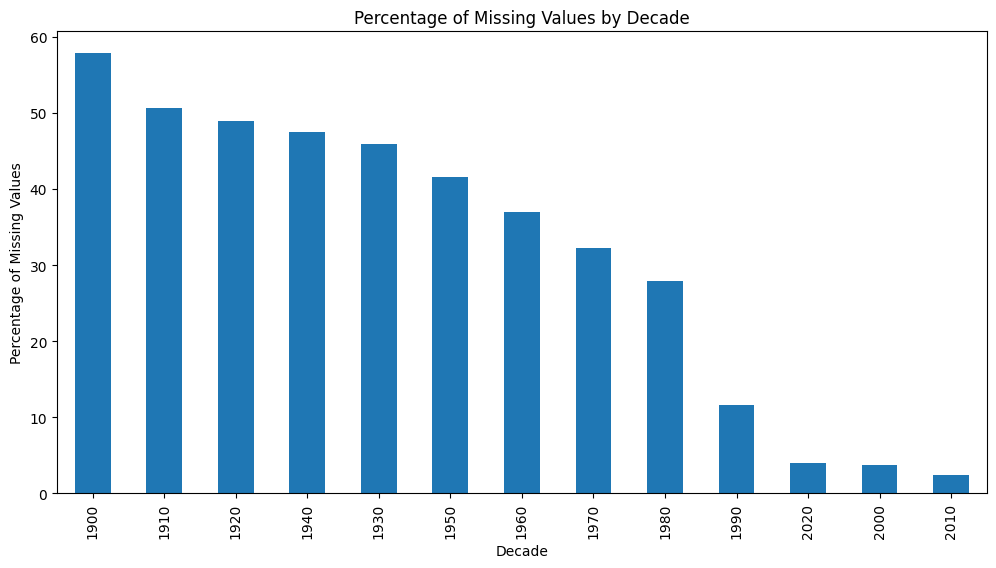

In [ ]:
# Plotting the distribution of missing values across decades

missing_percentage_by_decade = df_clean.groupby("Decade").apply(lambda x: x.isnull().mean().mean() * 100)
missing_percentage_by_decade = missing_percentage_by_decade.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_percentage_by_decade.plot(kind='bar')
plt.xlabel("Decade")
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values by Decade")
plt.xticks(rotation=90)
plt.show()

**Restricting the dataset to after 1970**

In [ ]:
# Restricting the dataset to years >= 1970 given the concentration of missing values in earlier years

df_clean = df_clean[df_clean['Year'] >= 1970]
df_clean.head()

,Country,Year,GDP_USD,Migration,Gini Index,Import_gdp,Corruption_index,Rule_of_law_index,Inflation,Unemployment,...,Govexp_GDP_lag1,Govexp_GDP_lag5,Govdef_GDP_lag1,Govdef_GDP_lag5,Govdebt_GDP_lag1,Govdebt_GDP_lag5,Cbrate_lag1,Cbrate_lag5,Migration_pct_change_lag1,Migration_pct_change_lag5
11,United States,1970,5173701.0,NaN,36.6,5.195178,0.073,0.950,5.90,4.98,...,29.54,26.43,0.16,-0.71,32.96,40.28,5.00,4.63,NaN,NaN
12,United States,1971,5344056.5,NaN,36.9,5.351934,0.075,0.951,4.29,5.95,...,34.24,27.18,-4.43,-1.05,32.59,37.60,3.00,5.00,NaN,NaN
13,United States,1972,5624913.5,NaN,36.7,5.802159,0.075,0.951,3.27,5.60,...,34.55,29.70,-5.28,-2.55,32.45,37.44,3.00,4.50,NaN,NaN
14,United States,1973,5942476.5,NaN,36.1,6.395435,0.075,0.952,6.18,4.88,...,17.80,29.46,-4.00,-1.32,27.35,35.81,5.50,4.00,NaN,NaN
15,United States,1974,5910355.0,NaN,35.5,8.248864,0.075,0.955,11.05,5.62,...,17.90,29.54,-2.74,0.16,25.80,32.96,9.83,5.00,NaN,NaN


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3300 entries, 11 to 7440
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Country                            3300 non-null   object  
 1   Year                               3300 non-null   int64   
 2   GDP_USD                            3135 non-null   float64 
 3   Migration                          2100 non-null   float64 
 4   Gini Index                         1921 non-null   float64 
 5   Import_gdp                         2908 non-null   float64 
 6   Corruption_index                   3219 non-null   float64 
 7   Rule_of_law_index                  3219 non-null   float64 
 8   Inflation                          3208 non-null   float64 
 9   Unemployment                       2866 non-null   float64 
 10  Govexp_GDP                         3078 non-null   float64 
 11  Govdef_GDP                         2993 non-nul

# T+1 Predictive model

**Defining predictors and target**

In [ ]:
# Dropping rows where any of the predictor columns have NaN values (missing values)

target = 'total_percentage_category'

predictors_1 = ['Migration_lag1', 'Migration_pct_change_lag1', 'Cbrate_lag1', 'Govdebt_GDP_lag1', 'Govdef_GDP_lag1', 'Govexp_GDP_lag1', 'Unemployment_lag1', 'Inflation_lag1', 'Corruption_index_lag1', 'Import_gdp_lag1', 'Gini Index_lag1', 'GDP_USD_lag1', 'prev_year_populist_share', 'Country_code', 'Decade']
df_clean_1 = df_clean.dropna(subset=predictors_1)
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 33 to 7314
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Country                            1517 non-null   object  
 1   Year                               1517 non-null   int64   
 2   GDP_USD                            1516 non-null   float64 
 3   Migration                          1517 non-null   float64 
 4   Gini Index                         1464 non-null   float64 
 5   Import_gdp                         1464 non-null   float64 
 6   Corruption_index                   1464 non-null   float64 
 7   Rule_of_law_index                  1464 non-null   float64 
 8   Inflation                          1517 non-null   float64 
 9   Unemployment                       1510 non-null   float64 
 10  Govexp_GDP                         1517 non-null   float64 
 11  Govdef_GDP                         1516 non-nul

**Our sample size for the T+1 model is 1517**

In [ ]:
# Define predictors and target
X = df_clean_1[predictors_1]
y = df_clean_1[target]

# Ensure they have the same length
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (1517, 15), y shape: (1517,)


## T+1 Model with random splitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train/test split
X_1 = df_clean_1[predictors_1]
y_1 = df_clean_1[target]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest Classifier
clf_1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_1.fit(X_train_1, y_train_1)

# Predictions
y_pred_1 = clf_1.predict(X_test_1)

# Evaluation
print("Accuracy:", accuracy_score(y_test_1, y_pred_1))
print("Classification Report:\n", classification_report(y_test_1, y_pred_1))

Accuracy: 0.8881578947368421
Classification Report:
               precision    recall  f1-score   support

     (0,15%]       0.98      0.91      0.95        57
    (15,30%]       0.83      0.95      0.88        55
    (30,50%]       0.84      0.78      0.81        74
      (50%+]       0.75      0.73      0.74        37
          0%       0.98      1.00      0.99        81

    accuracy                           0.89       304
   macro avg       0.87      0.87      0.87       304
weighted avg       0.89      0.89      0.89       304



In [ ]:
# Extract feature importances
feature_importance_1 = pd.Series(clf_1.feature_importances_, index=predictors_1).sort_values(ascending=False)

# Display feature importance
print(feature_importance_1)

prev_year_populist_share     0.301899
Corruption_index_lag1        0.090737
GDP_USD_lag1                 0.076502
Migration_lag1               0.070404
Gini Index_lag1              0.059722
Country_code                 0.057770
Import_gdp_lag1              0.050052
Govdebt_GDP_lag1             0.045444
Govexp_GDP_lag1              0.044896
Cbrate_lag1                  0.043269
Unemployment_lag1            0.042603
Migration_pct_change_lag1    0.034702
Decade                       0.028971
Govdef_GDP_lag1              0.027292
Inflation_lag1               0.025737
dtype: float64


**Hyperparameter tuning for T+1 model with random cross-validation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [None, 10, 20, 30],  # Tree depth
    "min_samples_split": [2, 5, 10],  # Min samples to split
    "min_samples_leaf": [1, 2, 4]  # Min samples in a leaf
}

# Initialize Grid Search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",  # Optimize for accuracy
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Display progress
)

# Train the Grid Search
grid_search.fit(X_train_1, y_train_1)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_rf_model_1 = grid_search.best_estimator_

# Predict using the optimized model
y_pred_best_1 = best_rf_model_1.predict(X_test_1)

# Evaluate performance
print("Updated Accuracy:", accuracy_score(y_test_1, y_pred_best_1))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

## T+1 Model with chronological splitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train (years < 2015) and test (years ≥ 2015)
X_train_1_time = X[df_clean_1["Year"] < 2015]
y_train_1_time = y[df_clean_1["Year"] < 2015]

X_test_1_time = X[df_clean_1["Year"] >= 2015]
y_test_1_time = y[df_clean_1["Year"] >= 2015]

# Initialize the Random Forest Classifier with default settings
clf_1_time = RandomForestClassifier(random_state=42)

# Train the model
clf_1_time.fit(X_train_1_time, y_train_1_time)

# Make predictions
y_pred_1_time = clf_1_time.predict(X_test_1_time)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test_1_time, y_pred_1_time))
print("Classification Report:\n", classification_report(y_test_1_time, y_pred_1_time))

Accuracy: 0.7724014336917563
Classification Report:
               precision    recall  f1-score   support

     (0,15%]       0.76      0.78      0.77        45
    (15,30%]       0.77      0.77      0.77       133
    (30,50%]       0.69      0.56      0.62       157
      (50%+]       0.67      0.81      0.73        94
          0%       0.95      1.00      0.97       129

    accuracy                           0.77       558
   macro avg       0.77      0.78      0.77       558
weighted avg       0.77      0.77      0.77       558



In [ ]:
# Extract feature importances
feature_importance_1_chrono = pd.Series(clf_1_time.feature_importances_, index=predictors_1).sort_values(ascending=False)

# Display feature importance
print(feature_importance_1_chrono)

prev_year_populist_share     0.305104
Corruption_index_lag1        0.091897
Migration_lag1               0.079385
GDP_USD_lag1                 0.076368
Country_code                 0.055717
Import_gdp_lag1              0.054045
Gini Index_lag1              0.050725
Unemployment_lag1            0.049779
Govexp_GDP_lag1              0.049185
Govdebt_GDP_lag1             0.047322
Migration_pct_change_lag1    0.041816
Cbrate_lag1                  0.039063
Govdef_GDP_lag1              0.026300
Inflation_lag1               0.020420
Decade                       0.012874
dtype: float64


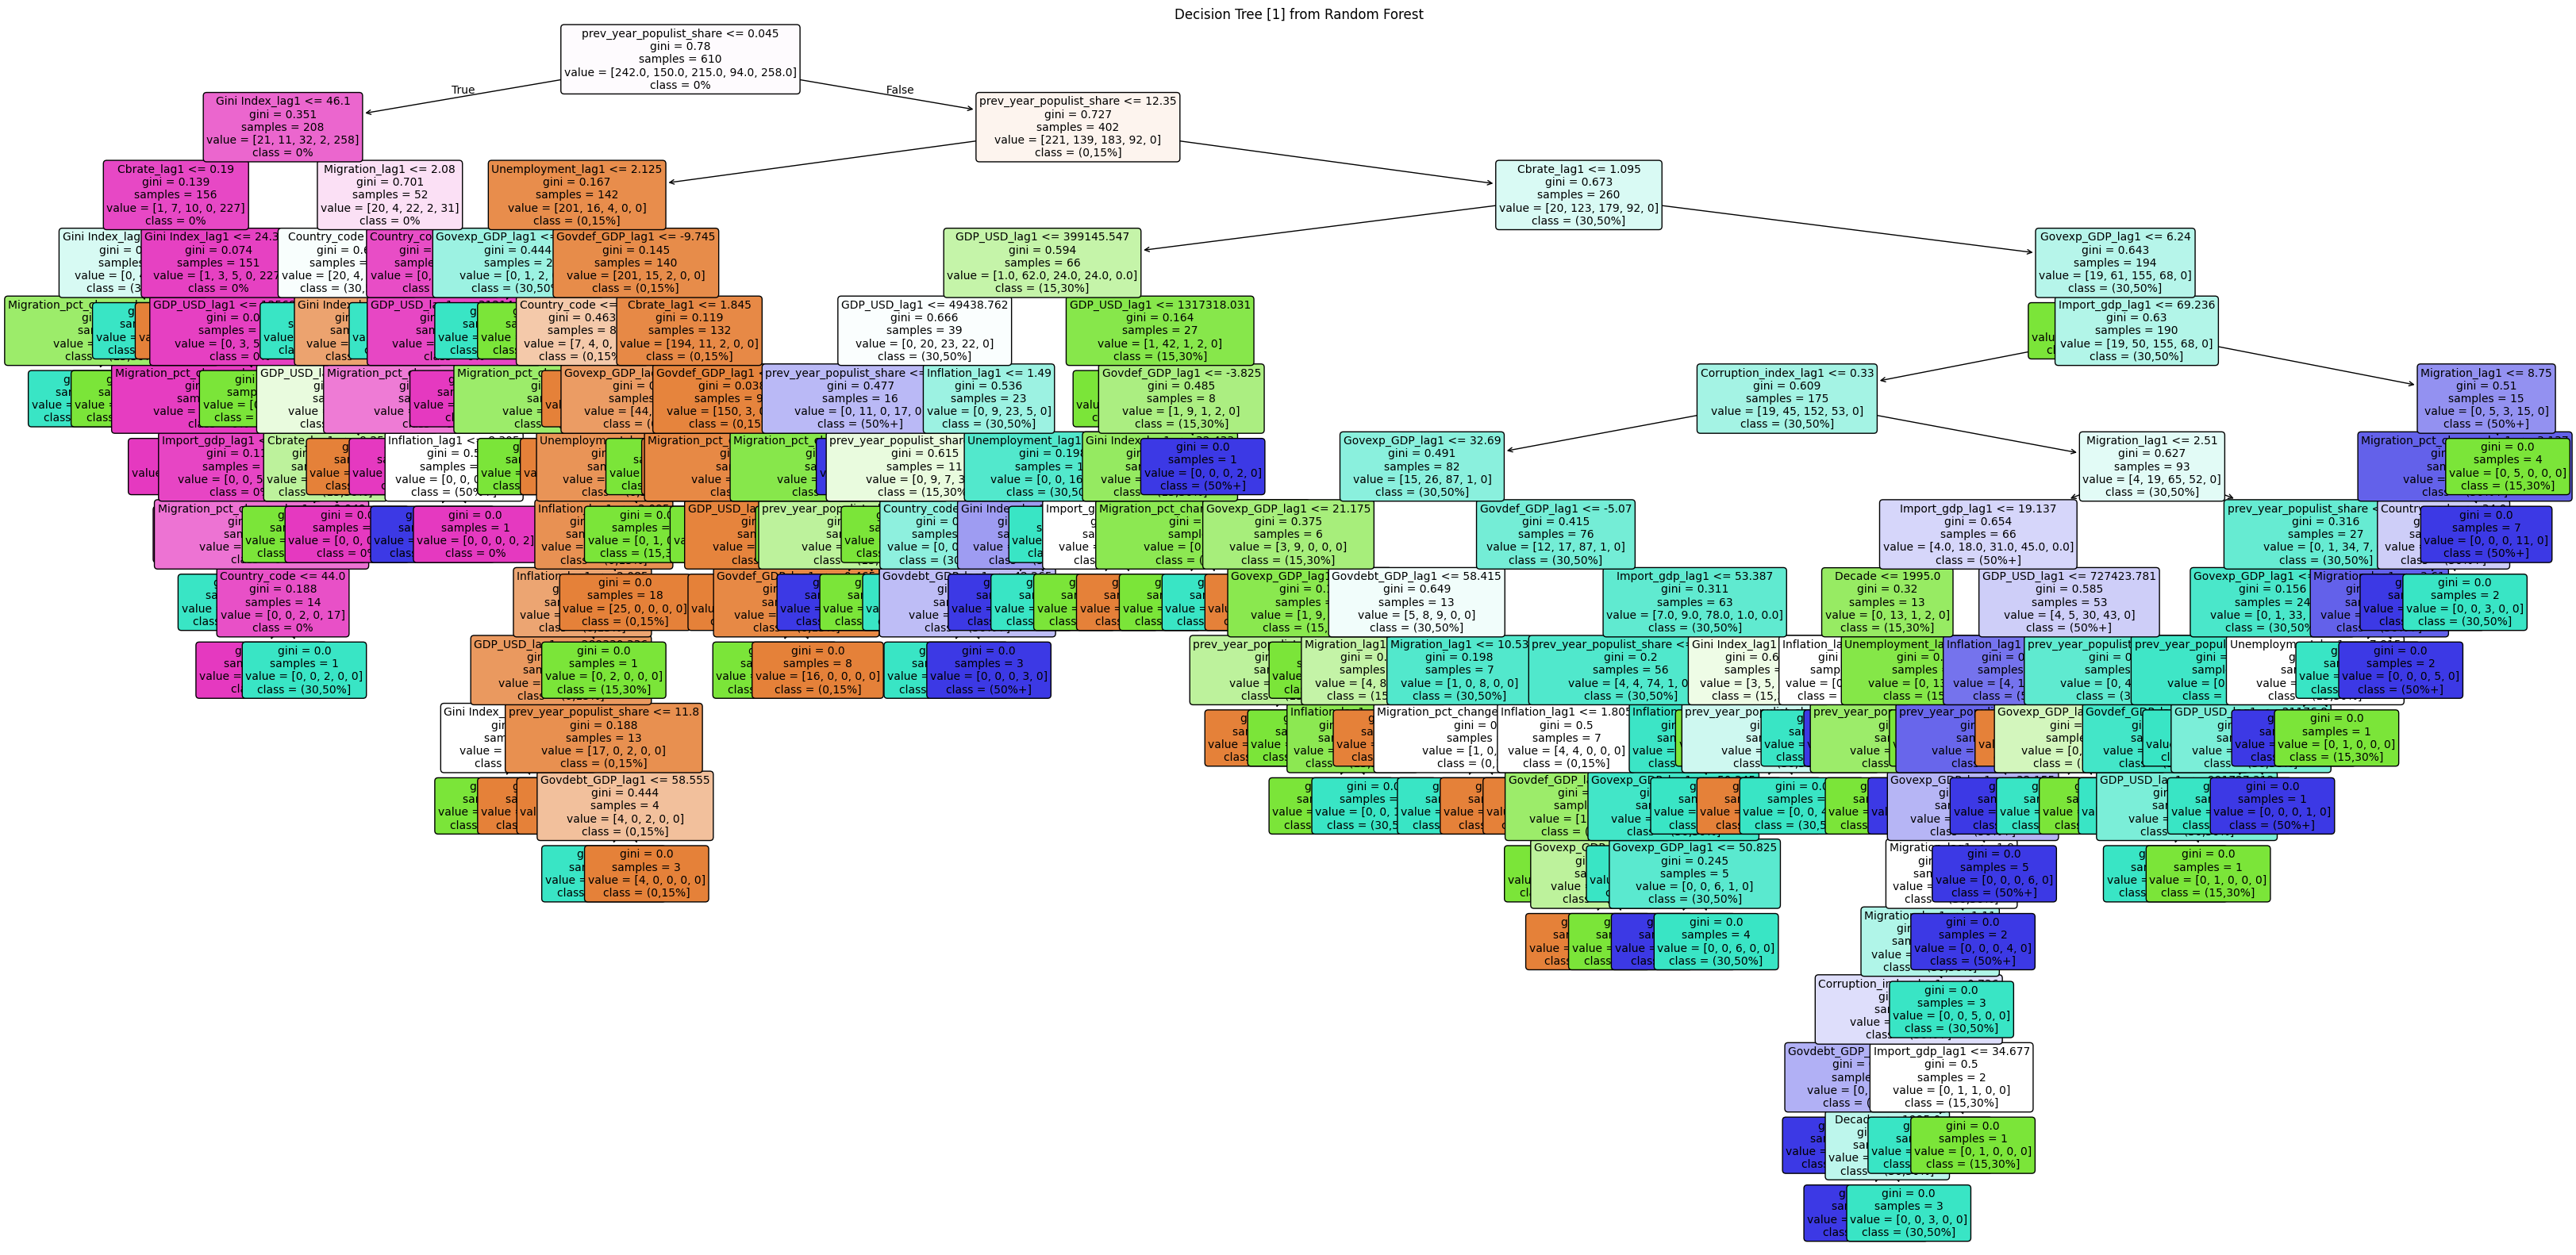

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Select a tree from the random forest
selected_tree = clf_1_time.estimators_[1]

# Plot the tree
plt.figure(figsize=(40, 20))
plot_tree(selected_tree, feature_names=X_train_1_time.columns, class_names=clf_1_time.classes_.astype(str), filled=True, rounded=True, fontsize=10)
plt.title(f"Decision Tree {[1]} from Random Forest")
plt.show()


# T+5 Predictive model

**Defining predictors and target**

In [ ]:
# Dropping rows where any of the predictor columns have NaN values (missing values)

target = 'total_percentage_category'

predictors_5 = ['Migration_lag5', 'Migration_pct_change_lag5', 'Cbrate_lag5', 'Govdebt_GDP_lag5', 'Govdef_GDP_lag5', 'Govexp_GDP_lag5', 'Unemployment_lag5', 'Inflation_lag5', 'Corruption_index_lag5', 'Import_gdp_lag5', 'Gini Index_lag5', 'GDP_USD_lag5', 'five_years_ago_populist_share', 'Country_code', 'Decade']
df_clean_5 = df_clean.dropna(subset=predictors_5)
df_clean_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1294 entries, 37 to 7315
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Country                            1294 non-null   object  
 1   Year                               1294 non-null   int64   
 2   GDP_USD                            1291 non-null   float64 
 3   Migration                          1294 non-null   float64 
 4   Gini Index                         1237 non-null   float64 
 5   Import_gdp                         1237 non-null   float64 
 6   Corruption_index                   1237 non-null   float64 
 7   Rule_of_law_index                  1237 non-null   float64 
 8   Inflation                          1294 non-null   float64 
 9   Unemployment                       1290 non-null   float64 
 10  Govexp_GDP                         1294 non-null   float64 
 11  Govdef_GDP                         1294 non-nul

**Our sample size for the T+5 model is 1294**

In [ ]:
# Define predictors and target
X_5 = df_clean_5[predictors_5]
y_5 = df_clean_5[target]

# Ensure they have the same length
print(f"X shape: {X_5.shape}, y shape: {y_5.shape}")

X shape: (1294, 15), y shape: (1294,)


## T+5 Model with random splitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Train/test split
X_5 = df_clean_5[predictors_5]
y_5 = df_clean_5[target]

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=42, stratify=y_5)

# Train the Random Forest Classifier
clf_5 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_5.fit(X_train_5, y_train_5)

# Predictions
y_pred_5 = clf_5.predict(X_test_5)

# Evaluation
print("Accuracy:", accuracy_score(y_test_5, y_pred_5))
print("Classification Report:\n", classification_report(y_test_5, y_pred_5))

Accuracy: 0.8841698841698842
Classification Report:
               precision    recall  f1-score   support

     (0,15%]       0.91      0.87      0.89        47
    (15,30%]       0.83      0.88      0.85        50
    (30,50%]       0.79      0.91      0.85        64
      (50%+]       0.91      0.66      0.76        32
          0%       1.00      0.98      0.99        66

    accuracy                           0.88       259
   macro avg       0.89      0.86      0.87       259
weighted avg       0.89      0.88      0.88       259



In [ ]:
# Extract feature importances
feature_importance_5 = pd.Series(clf_5.feature_importances_, index=predictors_5).sort_values(ascending=False)

# Display feature importance
print(feature_importance_5)

five_years_ago_populist_share    0.220748
Corruption_index_lag5            0.093809
GDP_USD_lag5                     0.093050
Migration_lag5                   0.072764
Country_code                     0.071282
Gini Index_lag5                  0.066944
Import_gdp_lag5                  0.055398
Govexp_GDP_lag5                  0.052610
Govdebt_GDP_lag5                 0.047754
Cbrate_lag5                      0.046687
Unemployment_lag5                0.046016
Migration_pct_change_lag5        0.044549
Decade                           0.031761
Govdef_GDP_lag5                  0.029091
Inflation_lag5                   0.027536
dtype: float64


## T+5 Model with chronological splitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train (years < 2015) and test (years ≥ 2015)
X_train_5_time = X_5[df_clean_5["Year"] < 2015]
y_train_5_time = y_5[df_clean_5["Year"] < 2015]

X_test_5_time = X_5[df_clean_5["Year"] >= 2015]
y_test_5_time = y_5[df_clean_5["Year"] >= 2015]

# Initialize the Random Forest Classifier with default settings
clf_5_time = RandomForestClassifier(random_state=42)

# Train the model
clf_5_time.fit(X_train_5_time, y_train_5_time)

# Make predictions
y_pred_5_time = clf_5_time.predict(X_test_5_time)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test_5_time, y_pred_5_time))
print("Classification Report:\n", classification_report(y_test_5_time, y_pred_5_time))

Accuracy: 0.7036363636363636
Classification Report:
               precision    recall  f1-score   support

     (0,15%]       0.54      0.61      0.57        41
    (15,30%]       0.70      0.70      0.70       134
    (30,50%]       0.67      0.42      0.52       153
      (50%+]       0.52      0.80      0.64        92
          0%       0.97      1.00      0.98       130

    accuracy                           0.70       550
   macro avg       0.68      0.71      0.68       550
weighted avg       0.72      0.70      0.70       550



In [ ]:
# Extract feature importances
feature_importance_5_chrono = pd.Series(clf_5_time.feature_importances_, index=predictors_1).sort_values(ascending=False)

# Display feature importance
print(feature_importance_5_chrono)

prev_year_populist_share     0.219009
Corruption_index_lag1        0.094708
GDP_USD_lag1                 0.084379
Migration_lag1               0.084018
Gini Index_lag1              0.064533
Country_code                 0.060503
Import_gdp_lag1              0.059929
Unemployment_lag1            0.059044
Govexp_GDP_lag1              0.053979
Migration_pct_change_lag1    0.052829
Govdebt_GDP_lag1             0.051929
Cbrate_lag1                  0.040826
Govdef_GDP_lag1              0.029528
Inflation_lag1               0.025193
Decade                       0.019592
dtype: float64


# Scorecards

**Replacing 2024 missing predictor values with 2023 values**

In [ ]:
# Step 1: Create separate DataFrames for 2023 and 2024
df_2023 = df_clean[df_clean["Year"] == 2023]
df_2024 = df_clean[df_clean["Year"] == 2024]

# Step 2: Set 'Country' as index to align data easily
df_2023 = df_2023.set_index("Country")
df_2024 = df_2024.set_index("Country")

# Step 3: Replace missing values in 2024 with corresponding values from 2023
df_2024_filled = df_2024.fillna(df_2023)  # This replaces NaNs in df_2024 with values from df_2023

# Step 4: Reset index to restore original format
df_2024_filled = df_2024_filled.reset_index()

df_2024_filled.head(60)

,Country,Year,GDP_USD,Migration,Gini Index,Import_gdp,Corruption_index,Rule_of_law_index,Inflation,Unemployment,...,Govexp_GDP_lag1,Govexp_GDP_lag5,Govdef_GDP_lag1,Govdef_GDP_lag5,Govdebt_GDP_lag1,Govdebt_GDP_lag5,Cbrate_lag1,Cbrate_lag5,Migration_pct_change_lag1,Migration_pct_change_lag5
0,United States,2024,22672584.00,15.2,41.3,13.88785,0.061,0.973,2.99,4.08,...,36.28,35.81,-7.07,-5.80,118.73,108.00,5.38,1.63,0.498339,0.269906
1,Argentina,2024,615524.69,4.3,40.7,13.89127,0.401,0.642,229.82,8.15,...,37.83,38.13,-5.36,-4.45,155.41,89.84,100.00,55.00,0.588235,-0.471698
2,Australia,2024,1501903.10,30.4,34.3,22.42594,0.026,0.992,3.31,4.15,...,37.20,38.86,-0.86,-4.40,49.01,46.66,4.35,0.75,0.751252,0.967519
3,Austria,2024,416148.91,25.5,30.7,57.34935,0.122,0.933,3.04,5.60,...,51.98,48.67,-2.65,0.57,77.54,70.64,3.88,-0.62,6.043956,2.301255
4,Belgium,2024,529170.94,20.0,26.6,84.76362,0.031,0.973,4.32,5.70,...,54.58,51.91,-4.44,-1.99,105.17,97.62,3.63,-0.45,3.050398,1.875733
5,Bolivia,2024,39500.15,1.5,40.9,30.92600,0.603,0.364,4.28,5.00,...,38.06,36.07,-10.95,-7.25,88.43,58.63,6.00,3.00,1.724138,1.470588
6,Brazil,2024,2006910.60,0.7,52.0,15.74367,0.449,0.814,4.27,7.16,...,45.45,43.04,-7.65,-4.86,84.68,87.12,11.75,4.50,8.333333,9.523810
7,Bulgaria,2024,64305.34,4.4,39.0,57.78280,0.334,0.775,2.84,4.30,...,37.74,35.87,-3.06,-0.96,22.05,18.32,2.90,0.00,11.971831,8.695652
8,Canada,2024,1806609.10,22.2,31.7,33.82319,0.027,0.968,2.44,6.18,...,42.49,40.59,-0.57,-0.02,107.50,90.21,5.00,1.75,0.454545,-0.544465
9,Chile,2024,286563.31,7.8,43.0,29.83036,0.070,0.957,3.90,8.48,...,27.39,26.50,-2.27,-2.73,39.41,28.33,8.25,1.75,0.649351,14.625850


## T+1 Scorecards

**Extracting the 2024 Predictor variables**

In [ ]:
# Defining predictor columns for the T+1 model
predictor_columns_1 = [
    "Migration", "Migration_pct_change", "Cbrate", "Govdebt_GDP", "Govdef_GDP", "Govexp_GDP", "Unemployment", "Inflation", "Corruption_index", "Import_gdp", "Gini Index", "GDP_USD", "prev_year_populist_share",
    "Country_code",
     "Decade",
]


# Keep only countries with complete predictor data
X_2024 = df_2024_filled[predictor_columns_1].dropna()  # Drops rows with missing values
valid_countries = df_2024_filled.loc[X_2024.index, "Country"]  # Retrieve matching country names

# Rename predictor columns: Add "_1" except for "Decade" and "Country_code"
renamed_columns = {
    col: col + "_lag1" for col in predictor_columns_1 if col not in ["Decade", "Country_code", "prev_year_populist_share"]
}

# Apply renaming while keeping the unchanged columns
X2024_2025 = df_2024[predictor_columns_1].rename(columns=renamed_columns)

# Display the new DataFrame
X2024_2025.head(30)


,Migration_lag1,Migration_pct_change_lag1,Cbrate_lag1,Govdebt_GDP_lag1,Govdef_GDP_lag1,Govexp_GDP_lag1,Unemployment_lag1,Inflation_lag1,Corruption_index_lag1,Import_gdp_lag1,Gini Index_lag1,GDP_USD_lag1,prev_year_populist_share,Country_code,Decade
Country,,,,,,,,,,,,,,,
United States,15.2,0.495868,4.38,121.01,-7.63,37.53,4.08,2.99,NaN,NaN,NaN,22672584.00,46.80,57,2020
Argentina,4.3,0.584795,32.00,91.47,-0.09,32.01,8.15,229.82,NaN,NaN,NaN,615524.69,40.40,0,2020
Australia,30.4,0.745650,4.35,49.33,-1.66,38.01,4.15,3.31,NaN,NaN,NaN,1501903.10,0.00,1,2020
Austria,25.5,5.699482,3.81,78.73,-3.37,53.37,5.60,3.04,NaN,NaN,NaN,416148.91,53.70,2,2020
Belgium,20.0,2.960103,3.81,104.99,-4.66,55.15,5.70,4.32,NaN,NaN,NaN,529170.94,37.66,3,2020
Bolivia,1.5,1.694915,NaN,93.90,-10.44,37.38,5.00,4.28,NaN,NaN,NaN,NaN,55.10,4,2020
Brazil,0.7,7.692308,12.25,87.57,-6.93,46.24,7.16,4.27,NaN,NaN,NaN,2006910.60,25.40,5,2020
Bulgaria,4.4,10.691824,3.80,23.75,-2.93,39.47,4.30,2.84,NaN,NaN,NaN,64305.34,35.40,6,2020
Canada,22.2,0.452489,3.25,106.08,-1.98,43.26,6.18,2.44,NaN,NaN,NaN,1806609.10,0.00,7,2020


In [ ]:
# Generate T+1 predictions
pred_2025 = clf_1_time.predict(X2024_2025)  # clf_1_time is the model trained for T+1 (2025)

# Instead of using df_2024_filled, use X2024_2025 to get the country names
# This ensures you're using the same index that was used for prediction
valid_countries_pred = X2024_2025.index

# Create a DataFrame to associate each prediction with the correct country
pred_2025_df = pd.DataFrame({
    "Country": valid_countries_pred.values,
    "Predicted Populist Vote Share in 2025": pred_2025
})

print(pred_2025_df)

           Country Predicted Populist Vote Share in 2025
0    United States                              (30,50%]
1        Argentina                              (30,50%]
2        Australia                                    0%
3          Austria                              (30,50%]
4          Belgium                              (30,50%]
5          Bolivia                                (50%+]
6           Brazil                              (15,30%]
7         Bulgaria                                (50%+]
8           Canada                                    0%
9            Chile                                    0%
10           China                                    0%
11        Colombia                               (0,15%]
12         Croatia                              (30,50%]
13          Cyprus                                    0%
14  Czech Republic                              (30,50%]
15         Denmark                              (30,50%]
16         Ecuador             

## T+5 Scorecards

In [ ]:
# Defining predictor columns for the T+5 model
predictor_columns_5 = [
    "Migration", "Migration_pct_change", "Cbrate", "Govdebt_GDP", "Govdef_GDP", "Govexp_GDP", "Unemployment", "Inflation", "Corruption_index", "Import_gdp", "Gini Index", "GDP_USD", "five_years_ago_populist_share",
    "Country_code",
     "Decade",
]

# Keep only countries with complete predictor data
X_2024 = df_2024_filled[predictor_columns_5].dropna()  # Drops rows with missing values
valid_countries = df_2024_filled.loc[X_2024.index, "Country"]  # Retrieve matching country names

# Rename predictor columns: Add "_1" except for "Decade" and "Country_code"
renamed_columns = {
    col: col + "_lag5" for col in predictor_columns_5 if col not in ["Decade", "Country_code", "five_years_ago_populist_share"]
}

# Apply renaming while keeping the unchanged columns
X2024_2029 = df_2024[predictor_columns_5].rename(columns=renamed_columns)

# Display the new DataFrame
X2024_2029.head(30)

,Migration_lag5,Migration_pct_change_lag5,Cbrate_lag5,Govdebt_GDP_lag5,Govdef_GDP_lag5,Govexp_GDP_lag5,Unemployment_lag5,Inflation_lag5,Corruption_index_lag5,Import_gdp_lag5,Gini Index_lag5,GDP_USD_lag5,five_years_ago_populist_share,Country_code,Decade
Country,,,,,,,,,,,,,,,
United States,15.2,0.495868,4.38,121.01,-7.63,37.53,4.08,2.99,NaN,NaN,NaN,22672584.00,46.10,57,2020
Argentina,4.3,0.584795,32.00,91.47,-0.09,32.01,8.15,229.82,NaN,NaN,NaN,615524.69,47.53,0,2020
Australia,30.4,0.745650,4.35,49.33,-1.66,38.01,4.15,3.31,NaN,NaN,NaN,1501903.10,0.00,1,2020
Austria,25.5,5.699482,3.81,78.73,-3.37,53.37,5.60,3.04,NaN,NaN,NaN,416148.91,53.70,2,2020
Belgium,20.0,2.960103,3.81,104.99,-4.66,55.15,5.70,4.32,NaN,NaN,NaN,529170.94,37.66,3,2020
Bolivia,1.5,1.694915,NaN,93.90,-10.44,37.38,5.00,4.28,NaN,NaN,NaN,NaN,46.96,4,2020
Brazil,0.7,7.692308,12.25,87.57,-6.93,46.24,7.16,4.27,NaN,NaN,NaN,2006910.60,31.10,5,2020
Bulgaria,4.4,10.691824,3.80,23.75,-2.93,39.47,4.30,2.84,NaN,NaN,NaN,64305.34,73.20,6,2020
Canada,22.2,0.452489,3.25,106.08,-1.98,43.26,6.18,2.44,NaN,NaN,NaN,1806609.10,0.00,7,2020


In [ ]:
# Generate T+1 predictions
pred_2029 = clf_5_time.predict(X2024_2029)  # clf_5_time is the model trained for T+5 (2029)

# This ensures you're using the same index that was used for prediction
valid_countries_pred = X2024_2029.index

# Create a DataFrame to associate each prediction with the correct country
pred_2029_df = pd.DataFrame({
    "Country": valid_countries_pred.values,
    "Predicted Populist Vote Share in 2029": pred_2029
})

print(pred_2029_df)

           Country Predicted Populist Vote Share in 2029
0    United States                              (30,50%]
1        Argentina                                (50%+]
2        Australia                                    0%
3          Austria                              (30,50%]
4          Belgium                              (30,50%]
5          Bolivia                                (50%+]
6           Brazil                              (15,30%]
7         Bulgaria                                (50%+]
8           Canada                                    0%
9            Chile                                    0%
10           China                                    0%
11        Colombia                               (0,15%]
12         Croatia                                (50%+]
13          Cyprus                                    0%
14  Czech Republic                              (30,50%]
15         Denmark                              (30,50%]
16         Ecuador             

# Scorecards - visualisations

In [ ]:
print("Columns in pred_2029_df:", pred_2029_df.columns)
print("Columns in pred_2025_df:", pred_2025_df.columns)

Columns in pred_2029_df: Index(['Country', 'Predicted Populist Vote Share in 2029'], dtype='object')
Columns in pred_2025_df: Index(['Country', 'Predicted Populist Vote Share in 2025'], dtype='object')


In [ ]:
pred_2025_df["Predicted Populist Vote Share in 2025"] = pred_2025_df["Predicted Populist Vote Share in 2025"].astype("category")
pred_2029_df["Predicted Populist Vote Share in 2029"] = pred_2029_df["Predicted Populist Vote Share in 2029"].astype("category")

In [ ]:
import pycountry

# Standardize country names to the pycountry framework
def standardize_country_name(country):
    try:
        return pycountry.countries.lookup(country).name
    except LookupError:
        return country

# Apply to dataframes
pred_2025_df["Country"] = pred_2025_df["Country"].apply(standardize_country_name)
pred_2029_df["Country"] = pred_2029_df["Country"].apply(standardize_country_name)


In [ ]:
# Define a color map for the categories
category_colors = {
    "0%": "green",
    "(0,15%]": "lightgreen",
    "(15,30%]": "yellow",
    "(30,50%]": "orange",
    "(50%+]": "red"
}

import plotly.express as px

fig_2025 = px.choropleth(
    pred_2025_df,
    locations="Country",  # Use country names
    locationmode="country names",
    color="Predicted Populist Vote Share in 2025",
    title="Predicted Populist Vote Share (2025)",
    color_discrete_map=category_colors,
    category_orders={"Predicted Populist Vote Share in 2025": list(category_colors.keys())}  # Ensure correct order
)

fig_2025.show()


fig_2029 = px.choropleth(
    pred_2029_df,
    locations="Country",
    locationmode="country names",
    color="Predicted Populist Vote Share in 2029",
    title="Predicted Populist Vote Share (2029)",
    color_discrete_map=category_colors,
    category_orders={"Predicted Populist Vote Share in 2029": list(category_colors.keys())}
)

fig_2029.show()
